In [51]:
import sys,os,json
import collections,math
import time,datetime,pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

############################################
########## Plot Style Declaration ##########
# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
# plt.style.use('ggplot')
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'times new roman'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

##########################################
########## data set declaration ##########
path_processed = "data/processed/"
path_final = "data/final/"

##### path to external files #####
path_fsq = "../../churn-4sq/data/"
path_yelp = "../../churn-yelp/data/"

##### fsq base datasets #####
fsq_f_venue = 'data/data_final.txt' # 12GB
fsq_f_graph = 'data/foursquare_graph.txt' # 25GB
fsq_f_profile = 'data/profiles_final.tsv' # 7GB
fsq_f_tip = 'data/tips_all.txt' # 31GB

##### Yelp base datasets #####
yelp_f_business = 'data/business.json' # 145.2MB
yelp_f_checkin = 'data/checkin.json'   # 63.3MB
yelp_f_review = 'data/review.json'     # 4.2GB
yelp_f_tip = 'data/tip.json'           # 197.6MB
yelp_f_user = 'data/user.json'         # 1.9GB
yelp_f_photos = 'data/photos.json'     # 26.9MB

##################################
########## End of Setup ##########

##### Geographical Change #####
import geopy
from geopy import distance as geopy_distance
coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)
print (geopy.distance.distance(coords_1, coords_2).km)

279.35290160430094


In [ ]:



y10_s2_h_vary = [0.690,0.696,0.703,0.706]
y20_s2_h_vary = [0.743,0.783,0.806,0.829]
y30_s2_h_vary = [0.763,0.798,0.822,0.843]
y40_s2_h_vary = [0.757,0.801,0.823,0.842]
y50_s2_h_vary = [0.826,0.845,0.869,0.872]

y10_h64_s_vary = [0.710,0.703,0.701]
y20_h64_s_vary = [0.828,0.806,0.804]
y30_h64_s_vary = [0.835,0.822,0.831]
y40_h64_s_vary = [0.836,0.823,0.825]
y50_h64_s_vary = [0.869,0.869,0.867]

f10_s2_h_vary = [ 0.644,0.648,0.649,0.649]
f20_s2_h_vary = [ 0.687,0.692,0.721,0.751]
f30_s2_h_vary = [ 0.701,0.712,0.741,0.759]
f40_s2_h_vary = [ 0.706,0.728,0.757,0.764]
f50_s2_h_vary = [ 0.735,0.756,0.777,0.794]

Y3 = [f10_s2_h_vary,
f20_s2_h_vary,
f30_s2_h_vary,
f40_s2_h_vary,
f50_s2_h_vary]

f10_h64_s_vary = [0.649,0.649,0.649]
f20_h64_s_vary = [0.705,0.721,0.724]
f30_h64_s_vary = [0.742,0.741,0.740]
f40_h64_s_vary = [0.749,0.757,0.758]
f50_h64_s_vary = [0.778,0.777,0.775]

Y4 = [f10_h64_s_vary,
f20_h64_s_vary,
f30_h64_s_vary,
f40_h64_s_vary,
f50_h64_s_vary]


x1 = [16, 32, 64, 128]
Y1 = [y10_s2_h_vary,
y20_s2_h_vary,
y30_s2_h_vary,
y40_s2_h_vary,
y50_s2_h_vary]

x2 = [1, 2, 4]
Y2 = [y10_h64_s_vary,
y20_h64_s_vary,
y30_h64_s_vary,
y40_h64_s_vary,
y50_h64_s_vary]

In [45]:
x = [i+1 for i in range(20)]
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


## EWC
### One More Class

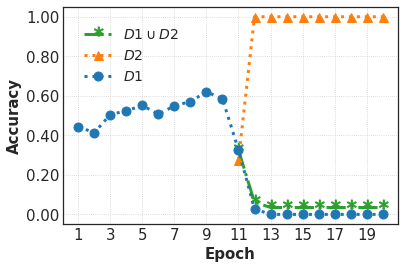

In [100]:
y1 = [0.4427767354596623, 0.4140087554721701, 0.5053158223889931, 0.5240775484677924, 0.551594746716698, 0.5059412132582864, 0.549718574108818, 0.5709818636647905, 0.6203877423389619, 0.5847404627892433]
precision_dict= {'average': [0.3011580513683121, 0.6222639149468417, 0.5140712945590994, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'test_total_prec': [0.3246831623415812, 0.27097163548581776, 0.06216053108026554, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875], 'x_task': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'x_iteration': [147, 154, 161, 168, 175, 182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266, 273, 280], 'all_tasks': [[0.32645403377110693, 0.24452782989368355, 0.028142589118198873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.27586206896551724, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]}
y2_d1 = precision_dict['all_tasks'][0] # d1 acc
y2_d2 = precision_dict['all_tasks'][1] # d2 acc
y2_d1_d2 = precision_dict['test_total_prec'] # d1_d2 acc
y2 = [y2_d1, y2_d2, y2_d1_d2]

# class 0: open door
# args_D2:  {'batch': 64, 'ewc_lambda': 10000000, 'lr2': 1e-05}
# acc_D1_D2_max:  0.3246831623415812
plotMovingDistChurnProba4(rX=x,rY=[y1,y2],rStdErrN='depends',
    rFileName='plots/opp_one_0',rLogAxis='no',
    rXLabel='Epoch',rYLabel='Accuracy')

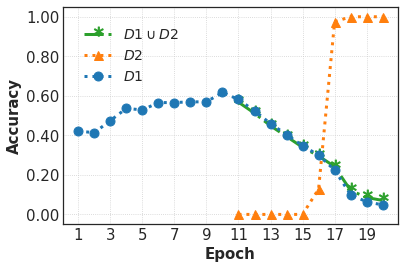

In [101]:
y1 = [0.4215080346106304, 0.4134734239802225, 0.4746600741656366, 0.5364647713226205, 0.5284301606922126, 0.565512978986403, 0.5661310259579728, 0.569221260815822, 0.5698393077873919, 0.6168108776266996]
precision_dict= {'average': [0.29079110012360937, 0.26390605686032137, 0.2620519159456119, 0.2521631644004944, 0.22960444993819532, 0.21631644004944375, 0.20179233621755252, 0.18695920889987638, 0.17398022249690975, 0.15667490729295427, 0.21397895470825012, 0.4827422268707806, 0.599355012519413, 0.5852904820766378, 0.550061804697157, 0.5349196538936959, 0.5318294190358467, 0.5284301606922126, 0.5241038318912238, 0.5219406674907293], 'test_total_prec': [0.5678937839468919, 0.5153892576946288, 0.5117682558841279, 0.4924562462281231, 0.4484007242003621, 0.4224502112251056, 0.3940856970428485, 0.3651176825588413, 0.33977066988533494, 0.3059746529873265, 0.2957151478575739, 0.2830416415208208, 0.2420036210018105, 0.19010259505129753, 0.12130356065178033, 0.09173204586602293, 0.08569704284852142, 0.07905853952926976, 0.07060953530476766, 0.0663850331925166], 'x_task': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'x_iteration': [84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160], 'all_tasks': [[0.5815822002472187, 0.5278121137206427, 0.5241038318912238, 0.5043263288009888, 0.45920889987639063, 0.4326328800988875, 0.40358467243510504, 0.37391841779975277, 0.3479604449938195, 0.31334981458590855, 0.29975278121137205, 0.273176761433869, 0.22435105067985167, 0.17058096415327564, 0.10012360939431397, 0.06983930778739184, 0.06365883807169345, 0.05686032138442522, 0.048207663782447466, 0.04388133498145859], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1282051282051282, 0.6923076923076923, 0.9743589743589743, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]}
y2_d1 = precision_dict['all_tasks'][0] # d1 acc
y2_d2 = precision_dict['all_tasks'][1] # d2 acc
y2_d1_d2 = precision_dict['test_total_prec'] # d1_d2 acc
y2 = [y2_d1, y2_d2, y2_d1_d2]

# class 8: open drawer, 
# args_D2:  {'batch': 64, 'ewc_lambda': 10000000, 'lr2': 1e-05}
# acc_D1_D2_max:  0.5678937839468919
plotMovingDistChurnProba4(rX=x,rY=[y1,y2],rStdErrN='depends',
    rFileName='plots/opp_one_8',rLogAxis='no',
    rXLabel='Epoch',rYLabel='Accuracy')

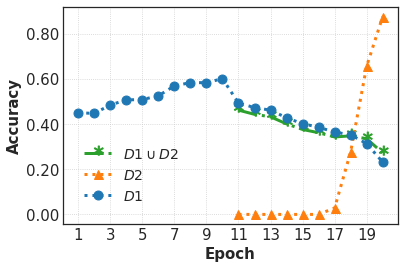

In [102]:
y1 = [0.45038659793814434, 0.4478092783505155, 0.485180412371134, 0.5077319587628866, 0.509020618556701, 0.5257731958762887, 0.5695876288659794, 0.5844072164948454, 0.5837628865979382, 0.6018041237113402]
precision_dict= {'average': [0.24677835051546393, 0.27963917525773196, 0.23679123711340205, 0.2615979381443299, 0.23099226804123713, 0.2271262886597938, 0.21423969072164947, 0.20715206185567012, 0.20103092783505155, 0.1958762886597938, 0.19329896907216496, 0.18588917525773196, 0.19663107511045655, 0.2178632793323515, 0.3146416298478154, 0.388506381934217, 0.4854657584683358, 0.5315138684339715, 0.5540746195385371, 0.5550104320078547], 'test_total_prec': [0.4622812311406156, 0.523838261919131, 0.44357272178636087, 0.49004224502112254, 0.43270971635485816, 0.42546771273385636, 0.4013277006638503, 0.38805069402534703, 0.37658418829209417, 0.36692818346409173, 0.3621001810500905, 0.34821967410983706, 0.34339167169583584, 0.3415811707905854, 0.34821967410983706, 0.3452021726010863, 0.3355461677730839, 0.30537115268557635, 0.2727821363910682, 0.23295111647555825], 'x_task': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'x_iteration': [105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], 'all_tasks': [[0.49355670103092786, 0.5592783505154639, 0.4735824742268041, 0.5231958762886598, 0.46198453608247425, 0.4542525773195876, 0.42847938144329895, 0.41430412371134023, 0.4020618556701031, 0.3917525773195876, 0.3865979381443299, 0.37177835051546393, 0.3646907216494845, 0.3595360824742268, 0.35309278350515466, 0.3389175257731959, 0.31378865979381443, 0.27255154639175255, 0.23195876288659795, 0.18621134020618557], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0761904761904762, 0.2761904761904762, 0.4380952380952381, 0.6571428571428571, 0.7904761904761904, 0.8761904761904762, 0.9238095238095239]]}
y2_d1 = precision_dict['all_tasks'][0] # d1 acc
y2_d2 = precision_dict['all_tasks'][1] # d2 acc
y2_d1_d2 = precision_dict['test_total_prec'] # d1_d2 acc
y2 = [y2_d1, y2_d2, y2_d1_d2]

# Class 16: toggle switch
#args_D2:  {'batch': 64, 'ewc_lambda': 10000000, 'lr2': 1e-05}
#acc_D1_D2_max:  0.523838261919131
plotMovingDistChurnProba4(rX=x,rY=[y1,y2],rStdErrN='depends',
    rFileName='plots/opp_one_16',rLogAxis='no',
    rXLabel='Epoch',rYLabel='Accuracy')

## EWC
### Half More Classes

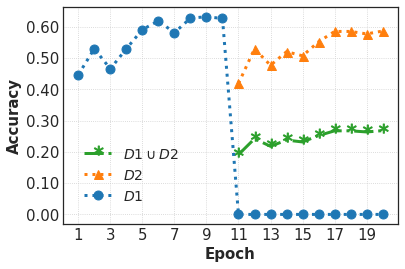

In [105]:
y1 = [0.44666666666666666, 0.53, 0.46555555555555556, 0.53, 0.5911111111111111, 0.6188888888888889, 0.5811111111111111, 0.6277777777777778, 0.6322222222222222, 0.6266666666666667]
precision_dict= {'average': [0.2093791281373844, 0.2093791281373844, 0.26486129458388374, 0.24438573315719947, 0.23844121532364598, 0.2536327608982827, 0.26023778071334214, 0.2509907529722589, 0.2536327608982827, 0.26420079260237783, 0.2760898282694848, 0.2701453104359313, 0.29260237780713344, 0.27344782034346105, 0.29260237780713344, 0.2668428005284016, 0.28863936591809775, 0.2892998678996037, 0.29326287978863935, 0.285336856010568], 'test_total_prec': [0.19130959565479783, 0.19130959565479783, 0.2420036210018105, 0.22329511164755583, 0.21786360893180445, 0.23174411587205793, 0.23777911888955944, 0.22933011466505734, 0.23174411587205793, 0.24140012070006034, 0.25226312613156304, 0.24683162341581172, 0.26735063367531686, 0.24984912492456246, 0.26735063367531686, 0.24381412190706095, 0.2637296318648159, 0.26433313216656606, 0.26795413397706697, 0.26071213035606516], 'x_task': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'x_iteration': [1176, 1232, 1288, 1344, 1400, 1456, 1512, 1568, 1624, 1680, 1736, 1792, 1848, 1904, 1960, 2016, 2072, 2128, 2184, 2240], 'all_tasks': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.4187582562747688, 0.4187582562747688, 0.5297225891677675, 0.48877146631439894, 0.47688243064729197, 0.5072655217965654, 0.5204755614266843, 0.5019815059445178, 0.5072655217965654, 0.5284015852047557, 0.5521796565389696, 0.5402906208718626, 0.5852047556142669, 0.5468956406869221, 0.5852047556142669, 0.5336856010568032, 0.5772787318361955, 0.5785997357992074, 0.5865257595772787, 0.570673712021136]]}
y2_d1 = precision_dict['all_tasks'][0] # d1 acc
y2_d2 = precision_dict['all_tasks'][1] # d2 acc
y2_d1_d2 = precision_dict['test_total_prec'] # d1_d2 acc
y2 = [y2_d1, y2_d2, y2_d1_d2]

# Class 9:16
# args_D2:  {'batch': 64, 'ewc_lambda': 10000000, 'lr2': 1e-05}
# acc_D1_D2_max:  0.26795413397706697
plotMovingDistChurnProba4(rX=x,rY=[y1,y2],rStdErrN='depends',
    rFileName='plots/opp_half_9-16',rLogAxis='no',
    rXLabel='Epoch',rYLabel='Accuracy')

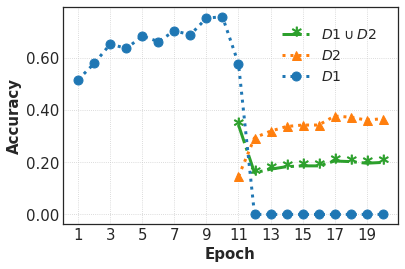

In [106]:
y1 = [0.5165125495376486, 0.5785997357992074, 0.6525759577278731, 0.6354029062087186, 0.6829590488771466, 0.6618229854689565, 0.702774108322325, 0.6882430647291942, 0.7516512549537648, 0.7569352708058125]
precision_dict= {'average': [0.3614171436958755, 0.25386026713635695, 0.14666666666666667, 0.14888888888888888, 0.15944444444444444, 0.16055555555555556, 0.16833333333333333, 0.1761111111111111, 0.1711111111111111, 0.18333333333333332, 0.1711111111111111, 0.1761111111111111, 0.18833333333333332, 0.18555555555555556, 0.18611111111111112, 0.18333333333333332, 0.18055555555555555, 0.19277777777777777, 0.18333333333333332, 0.1827777777777778], 'test_total_prec': [0.3427881713940857, 0.2444176222088111, 0.15932407966203982, 0.16173808086904043, 0.1732045866022933, 0.1744115872057936, 0.1828605914302957, 0.19130959565479783, 0.18587809293904647, 0.1991550995775498, 0.18587809293904647, 0.19130959565479783, 0.20458660229330114, 0.2015691007845504, 0.20217260108630053, 0.1991550995775498, 0.19613759806879905, 0.20941460470730236, 0.1991550995775498, 0.19855159927579963], 'x_task': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'x_iteration': [1134, 1188, 1242, 1296, 1350, 1404, 1458, 1512, 1566, 1620, 1674, 1728, 1782, 1836, 1890, 1944, 1998, 2052, 2106, 2160], 'all_tasks': [[0.5772787318361955, 0.3632760898282695, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.14555555555555555, 0.14444444444444443, 0.29333333333333333, 0.29777777777777775, 0.3188888888888889, 0.3211111111111111, 0.33666666666666667, 0.3522222222222222, 0.3422222222222222, 0.36666666666666664, 0.3422222222222222, 0.3522222222222222, 0.37666666666666665, 0.3711111111111111, 0.37222222222222223, 0.36666666666666664, 0.3611111111111111, 0.38555555555555554, 0.36666666666666664, 0.3655555555555556]]}
y2_d1 = precision_dict['all_tasks'][0] # d1 acc
y2_d2 = precision_dict['all_tasks'][1] # d2 acc
y2_d1_d2 = precision_dict['test_total_prec'] # d1_d2 acc
y2 = [y2_d1, y2_d2, y2_d1_d2]

# Class 0:9
#args_D2:  {'batch': 64, 'ewc_lambda': 10000000, 'lr2': 1e-05}
#acc_D1_D2_max:  0.3427881713940857
plotMovingDistChurnProba4(rX=x,rY=[y1,y2],rStdErrN='depends',
    rFileName='plots/opp_half_0-9',rLogAxis='no',
    rXLabel='Epoch',rYLabel='Accuracy')

## Online EWC
### One More Class

In [113]:
len(y2_d1)

23

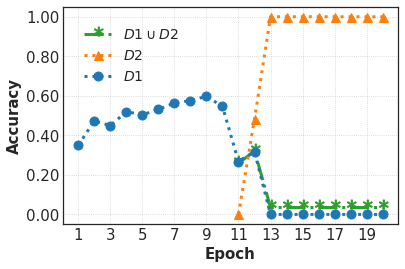

In [115]:
y1 = [0.35021888680425267, 0.4727954971857411, 0.44965603502188867, 0.5196998123827392, 0.5040650406504065, 0.5309568480300187, 0.5634771732332708, 0.575984990619137, 0.5972482801751094, 0.5465916197623515]
precision_dict= {'average': [0.13352095059412133, 0.09849906191369606, 0.3996032002760346, 0.4802624485130793, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'x_iteration': [72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138], 'test_total_prec': [0.2576946288473144, 0.19010259505129753, 0.32226916113458054, 0.1412190706095353, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875, 0.03500301750150875], 'x_task': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'all_tasks': [[0.26704190118824267, 0.19699812382739212, 0.316447779862414, 0.11569731081926204, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.4827586206896552, 0.8448275862068966, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]}
y2_d1 = precision_dict['all_tasks'][0] # d1 acc
y2_d2 = precision_dict['all_tasks'][1] # d2 acc
y2_d1_d2 = precision_dict['test_total_prec'] # d1_d2 acc
y2 = [y2_d1, y2_d2, y2_d1_d2]

# class 0: open door
# args_D2:  {'batch': 64, 'ewc_lambda': 10000000, 'lr2': 1e-05}
# acc_D1_D2_max:  0.3246831623415812
plotMovingDistChurnProba4(rX=x,rY=[y1,y2],rStdErrN='depends',
    rFileName='plots/opp_ewc_online_one_0',rLogAxis='no',
    rXLabel='Epoch',rYLabel='Accuracy')

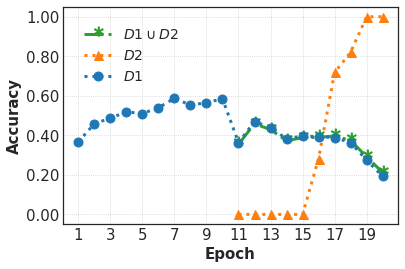

In [116]:
y1 = [0.3665018541409147, 0.45859085290482077, 0.48702101359703337, 0.5185414091470952, 0.5105067985166872, 0.5395550061804697, 0.5871446229913473, 0.5531520395550061, 0.5648949320148331, 0.5852904820766378]
precision_dict= {'average': [0.18170580964153277, 0.18479604449938195, 0.23485784919653893, 0.23702101359703337, 0.21971569839307786, 0.19746600741656367, 0.19097651421508036, 0.19530284301606923, 0.19870210135970334, 0.2780973661690596, 0.33756457798484996, 0.45387626382682006, 0.5533501315330734, 0.5518050141041488, 0.5919622198979431, 0.6182133688314159, 0.6372064276885043, 0.6140296662546354, 0.5964153275648949, 0.5896168108776267], 'x_iteration': [42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80], 'test_total_prec': [0.3548581774290887, 0.36089318044659024, 0.4586602293301147, 0.46288473144236575, 0.42908871454435726, 0.3856366928183464, 0.37296318648159327, 0.38141219070609533, 0.38805069402534703, 0.3964996982498491, 0.3904646952323476, 0.3977066988533494, 0.3964996982498491, 0.39348219674109836, 0.37417018708509353, 0.3277006638503319, 0.29149064574532285, 0.24622812311406156, 0.21182860591430297, 0.19855159927579963], 'x_task': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'all_tasks': [[0.36341161928306553, 0.3695920889987639, 0.46971569839307786, 0.47404202719406674, 0.4394313967861557, 0.39493201483312734, 0.3819530284301607, 0.39060568603213847, 0.3974042027194067, 0.40234857849196537, 0.3930778739184178, 0.39493201483312734, 0.38875154511742893, 0.3856613102595797, 0.36341161928306553, 0.31334981458590855, 0.27441285537700866, 0.2280593325092707, 0.19283065512978986, 0.1792336217552534], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15384615384615385, 0.28205128205128205, 0.5128205128205128, 0.717948717948718, 0.717948717948718, 0.8205128205128205, 0.9230769230769231, 1.0, 1.0, 1.0, 1.0]]}
y2_d1 = precision_dict['all_tasks'][0] # d1 acc
y2_d2 = precision_dict['all_tasks'][1] # d2 acc
y2_d1_d2 = precision_dict['test_total_prec'] # d1_d2 acc
y2 = [y2_d1, y2_d2, y2_d1_d2]

# class 8: open drawer, 
# args_D2:  {'batch': 64, 'ewc_lambda': 10000000, 'lr2': 1e-05}
# acc_D1_D2_max:  0.5678937839468919
plotMovingDistChurnProba4(rX=x,rY=[y1,y2],rStdErrN='depends',
    rFileName='plots/opp_ewc_online_one_8',rLogAxis='no',
    rXLabel='Epoch',rYLabel='Accuracy')

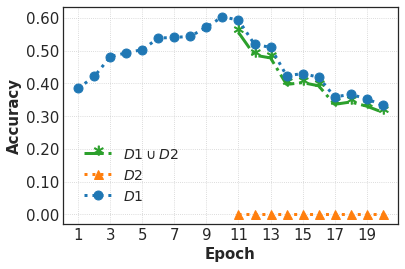

In [117]:
y1 = [0.3853092783505155, 0.4213917525773196, 0.48195876288659795, 0.49355670103092786, 0.5032216494845361, 0.538659793814433, 0.5405927835051546, 0.5438144329896907, 0.5721649484536082, 0.6037371134020618]
precision_dict= {'average': [0.2967139175257732, 0.24355670103092783, 0.25966494845360827, 0.26385309278350516, 0.2551546391752577, 0.2348582474226804, 0.21198453608247422, 0.20103092783505155, 0.21488402061855671, 0.2184278350515464, 0.20972938144329897, 0.19039948453608246, 0.1794458762886598, 0.17751288659793815, 0.18331185567010308, 0.18266752577319587, 0.17654639175257733, 0.17074742268041238, 0.16655927835051546, 0.16688144329896906, 0.16784793814432988, 0.1639819587628866, 0.15947164948453607, 0.15528350515463918, 0.15496134020618557], 'x_iteration': [52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100], 'test_total_prec': [0.555823777911889, 0.45624622812311405, 0.4864212432106216, 0.49426674713337354, 0.4779722389861195, 0.43995171997585997, 0.39710319855159926, 0.37658418829209417, 0.40253470126735064, 0.4091732045866023, 0.3928786964393482, 0.3566686783343392, 0.33614966807483404, 0.33252866626433314, 0.34339167169583584, 0.3421846710923355, 0.33071816535908266, 0.31985515992757996, 0.312009656004828, 0.31261315630657815, 0.31442365721182863, 0.3071816535908268, 0.2987326493663247, 0.29088714544357275, 0.2902836451418226], 'x_task': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'all_tasks': [[0.5934278350515464, 0.48711340206185566, 0.5193298969072165, 0.5277061855670103, 0.5103092783505154, 0.4697164948453608, 0.42396907216494845, 0.4020618556701031, 0.42976804123711343, 0.4368556701030928, 0.41945876288659795, 0.38079896907216493, 0.3588917525773196, 0.3550257731958763, 0.36662371134020616, 0.36533505154639173, 0.35309278350515466, 0.34149484536082475, 0.3331185567010309, 0.3337628865979381, 0.33569587628865977, 0.3279639175257732, 0.31894329896907214, 0.31056701030927836, 0.30992268041237114], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
y2_d1 = precision_dict['all_tasks'][0] # d1 acc
y2_d2 = precision_dict['all_tasks'][1] # d2 acc
y2_d1_d2 = precision_dict['test_total_prec'] # d1_d2 acc
y2 = [y2_d1, y2_d2, y2_d1_d2]

# Class 16: toggle switch
#args_D2:  {'batch': 64, 'ewc_lambda': 10000000, 'lr2': 1e-05}
#acc_D1_D2_max:  0.523838261919131
plotMovingDistChurnProba4(rX=x,rY=[y1,y2],rStdErrN='depends',
    rFileName='plots/opp_ewc_online_one_16',rLogAxis='no',
    rXLabel='Epoch',rYLabel='Accuracy')

## Online EWC
### Half More Classes

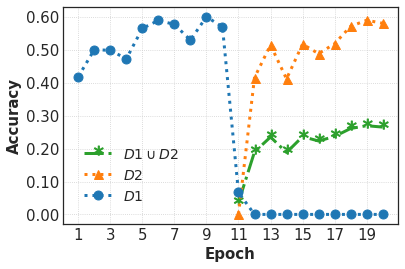

In [118]:
y1 = [0.41888888888888887, 0.5011111111111111, 0.4988888888888889, 0.47333333333333333, 0.5655555555555556, 0.59, 0.5777777777777777, 0.53, 0.6011111111111112, 0.57]
precision_dict= {'average': [0.03333333333333333, 0.2093791281373844, 0.20805812417437253, 0.261558784676354, 0.2575957727873184, 0.2357992073976222, 0.20607661822985468, 0.22919418758256274, 0.25891677675033026, 0.27410832232496696, 0.24438573315719947, 0.261558784676354, 0.25957727873183617, 0.27410832232496696, 0.285997357992074, 0.2912813738441215, 0.2952443857331572, 0.2906208718626156, 0.2906208718626156, 0.2919418758256275], 'x_iteration': [588, 616, 644, 672, 700, 728, 756, 784, 812, 840, 868, 896, 924, 952, 980, 1008, 1036, 1064, 1092, 1120], 'test_total_prec': [0.036210018105009054, 0.19130959565479783, 0.19010259505129753, 0.23898611949305976, 0.23536511768255883, 0.21544960772480387, 0.18829209414604708, 0.20941460470730236, 0.23657211828605915, 0.2504526252263126, 0.22329511164755583, 0.23898611949305976, 0.2371756185878093, 0.2504526252263126, 0.2613156306578153, 0.26614363307181654, 0.26976463488231744, 0.2655401327700664, 0.2655401327700664, 0.2667471333735667], 'x_task': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'all_tasks': [[0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.4187582562747688, 0.41611624834874505, 0.523117569352708, 0.5151915455746368, 0.4715984147952444, 0.41215323645970936, 0.4583883751651255, 0.5178335535006605, 0.5482166446499339, 0.48877146631439894, 0.523117569352708, 0.5191545574636723, 0.5482166446499339, 0.571994715984148, 0.582562747688243, 0.5904887714663144, 0.5812417437252312, 0.5812417437252312, 0.583883751651255]]}
y2_d1 = precision_dict['all_tasks'][0] # d1 acc
y2_d2 = precision_dict['all_tasks'][1] # d2 acc
y2_d1_d2 = precision_dict['test_total_prec'] # d1_d2 acc
y2 = [y2_d1, y2_d2, y2_d1_d2]

# class 0: open door
# args_D2:  {'batch': 64, 'ewc_lambda': 10000000, 'lr2': 1e-05}
# acc_D1_D2_max:  0.3246831623415812
plotMovingDistChurnProba4(rX=x,rY=[y1,y2],rStdErrN='depends',
    rFileName='plots/opp_ewc_online_half_9-16',rLogAxis='no',
    rXLabel='Epoch',rYLabel='Accuracy')


## SI
### One More Class

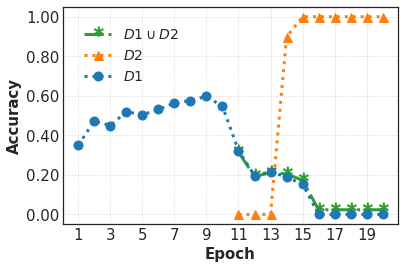

In [121]:
y1 = [0.35021888680425267, 0.4727954971857411, 0.44965603502188867, 0.5196998123827392, 0.5040650406504065, 0.5309568480300187, 0.5634771732332708, 0.575984990619137, 0.5972482801751094, 0.5465916197623515]
precision_dict= {'average': [0.161619283065513, 0.10074165636588381, 0.09826946847960445, 0.10197775030902348, 0.10815822002472188, 0.4756267630186048, 0.5429701118823492, 0.5859085290482077, 0.57663782447466, 0.5392459826946848, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'x_iteration': [42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80], 'test_total_prec': [0.3156306578153289, 0.19674109837054918, 0.19191309595654799, 0.1991550995775498, 0.2112251056125528, 0.22027761013880506, 0.2051901025950513, 0.19130959565479783, 0.1732045866022933, 0.10018105009052504, 0.023536511768255886, 0.023536511768255886, 0.023536511768255886, 0.023536511768255886, 0.023536511768255886, 0.023536511768255886, 0.023536511768255886, 0.023536511768255886, 0.023536511768255886, 0.023536511768255886], 'x_task': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'all_tasks': [[0.323238566131026, 0.20148331273176762, 0.1965389369592089, 0.20395550061804696, 0.21631644004944375, 0.207663782447466, 0.188504326328801, 0.17181705809641531, 0.15327564894932014, 0.07849196538936959, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.7435897435897436, 0.8974358974358975, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]}
y2_d1 = precision_dict['all_tasks'][0] # d1 acc
y2_d2 = precision_dict['all_tasks'][1] # d2 acc
y2_d1_d2 = precision_dict['test_total_prec'] # d1_d2 acc
y2 = [y2_d1, y2_d2, y2_d1_d2]

# Class 16: toggle switch
# args_D2:  si_c 0.01 , epsilon 0.1
plotMovingDistChurnProba4(rX=x,rY=[y1,y2],rStdErrN='depends',
    rFileName='plots/opp_si_one_0',rLogAxis='no',
    rXLabel='Epoch',rYLabel='Accuracy')

## SI
### Half More Classes

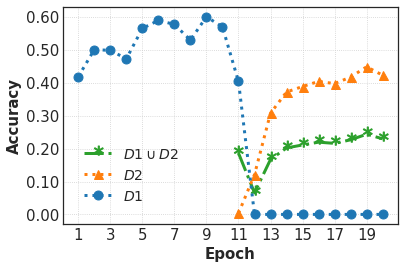

In [122]:
y1 = [0.41888888888888887, 0.5011111111111111, 0.4988888888888889, 0.47333333333333333, 0.5655555555555556, 0.59, 0.5777777777777777, 0.53, 0.6011111111111112, 0.57]
precision_dict= {'average': [0.2037802730074857, 0.19007485689123735, 0.06055555555555556, 0.07555555555555556, 0.15388888888888888, 0.19777777777777777, 0.18611111111111112, 0.19611111111111112, 0.19444444444444445, 0.20833333333333334, 0.20222222222222222, 0.21555555555555556, 0.1988888888888889, 0.1827777777777778, 0.2088888888888889, 0.19666666666666666, 0.22444444444444445, 0.21166666666666667, 0.21166666666666667, 0.21222222222222223], 'x_iteration': [567, 594, 621, 648, 675, 702, 729, 756, 783, 810, 837, 864, 891, 918, 945, 972, 999, 1026, 1053, 1080], 'test_total_prec': [0.18648159324079663, 0.1955340977670489, 0.06578153289076645, 0.08207604103802052, 0.16716958358479178, 0.2148461074230537, 0.20217260108630053, 0.21303560651780326, 0.2112251056125528, 0.22631261315630657, 0.21967410983705493, 0.23415811707905854, 0.216053108026554, 0.19855159927579963, 0.22691611345805673, 0.21363910681955342, 0.24381412190706095, 0.22993361496680748, 0.22993361496680748, 0.23053711526855764], 'x_task': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'all_tasks': [[0.404227212681638, 0.12681638044914134, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0033333333333333335, 0.25333333333333335, 0.12111111111111111, 0.1511111111111111, 0.30777777777777776, 0.39555555555555555, 0.37222222222222223, 0.39222222222222225, 0.3888888888888889, 0.4166666666666667, 0.40444444444444444, 0.4311111111111111, 0.3977777777777778, 0.3655555555555556, 0.4177777777777778, 0.3933333333333333, 0.4488888888888889, 0.42333333333333334, 0.42333333333333334, 0.42444444444444446]]}
y2_d1 = precision_dict['all_tasks'][0] # d1 acc
y2_d2 = precision_dict['all_tasks'][1] # d2 acc
y2_d1_d2 = precision_dict['test_total_prec'] # d1_d2 acc
y2 = [y2_d1, y2_d2, y2_d1_d2]

# class 0: open door
# args_D2:  si_c 0.01 , epsilon 0.1
plotMovingDistChurnProba4(rX=x,rY=[y1,y2],rStdErrN='depends',
    rFileName='plots/opp_si_half_9-16',rLogAxis='no',
    rXLabel='Epoch',rYLabel='Accuracy')


In [114]:
def plotMovingDistChurnProba4(rX,rY,rStdErrN,rFileName,rLogAxis,rXLabel,rYLabel):
    y1 = rY[0]
    y2 = rY[1]
    y2_d1 = [] # d1 acc
    y2_d2 = [] # d2 acc
    y2_d1_d2 = [] # d1_d2 acc
    for i in range(0, 20,2):
        y2_d1.append(y2[0][i])
        y2_d2.append(y2[1][i])
        y2_d1_d2.append(y2[2][i])
#     plt.plot(x, Y[4], linestyle='-.', color='C4', marker='s', markersize=10,markerfacecolor='none', zorder=3, label='$k = 50$')
#     plt.plot(x, Y[3], linestyle=':', color='C3', marker='v', markersize=10,markerfacecolor='none', zorder=3, label='$k = 40$')
#     plt.plot(x, Y[2], linestyle=':', color='C2', marker='$*$', markersize=10,markerfacecolor='none', zorder=3, label='$k = 30$')
#     plt.plot(x, Y[1], linestyle='-.', color='C1', marker='^', markersize=10,markerfacecolor='none', zorder=3, label='$k = 20$')
#     plt.plot(x, Y[0], linestyle=':', color='C0', marker='o', markersize=10,markerfacecolor='none', zorder=3, label='$k = 10$')
    
    #plt.plot(x, Y[4], linestyle='-.', color='C4', marker='s', markersize=10, zorder=3, label='$k = 50$')
    #plt.plot(x[10:], y2_d1_d2, linestyle=':', color='C3', marker='v', markersize=10, zorder=3, label='$k = 40$')
    plt.plot(x[10:], y2_d1_d2, linestyle='-.', color='C2', marker='$*$', markersize=15, zorder=3, label='$D1 \cup D2$')
    plt.plot(x[10:], y2_d2, linestyle=':', color='C1', marker='^', markersize=9, zorder=3, label='$D2$')
    plt.plot(x, y1+y2_d1, linestyle=':', color='C0', marker='o', markersize=9, zorder=3, label='$D1$')
    
    
#     plt.axis([-5, 205, 0.1, 0.6])
    if rLogAxis == 'x':
        plt.xscale('log')
#         plt.axis([4, 210, 0.1, 0.6])
    elif rLogAxis == 'y':
        plt.yscale('log')
    elif rLogAxis == 'xy':
        plt.xscale('log')
        plt.yscale('log')
    else:
        pass
    
    plt.grid(True, which="both", ls=":")
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))
    plt.ylabel(rYLabel)
    plt.xlabel(rXLabel)
#     leg = plt.legend()
    legend_properties = {'weight':'bold'}
    
    leg = plt.legend(loc='best', numpoints=1, ncol=1, fancybox=True, borderpad=1, framealpha=0.0, prop=legend_properties)
#     leg.get_frame().set_linewidth(1)
#     leg.get_frame().set_edgecolor('b')
#     leg.get_frame().set_facecolor('white')

    xmin, xmax, ymin, ymax = plt.axis()
    # plt.axis([8, 102, 0.0, 1.01])
#     plt.xticks(x, ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'], rotation=90)
#     plt.xticks(x, ['0%', '20%','40%', '60%', '80%', '100%'])
    plt.xticks(np.arange(1, 20, step=2))
#     plt.xticks(['1', '2','3', '4'])
#     plt.axis([5, 220, 0.15, 0.55])
#     plt.axis([0, , 0.6, 0.8])
    if (len(rFileName) > 10) and (rFileName != 'not now'):
        plt.savefig(rFileName + '.pdf', bbox_inches='tight')
    plt.show()

## reference codes below

In [ ]:
plotMovingDistChurnProba4(rXTip=x2,rY1=Y4,rStdErrN='depends',
    rFileName='plots/4sq_h64_s_vary',rLogAxis='no',
    rXLabel='# LSTM layers',rYLabel='AUC')